In [6]:
import pandas as pd

data = pd.read_csv("Churn_Modelling.csv")
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Basic info
data.info()

# Churn rate
churn_rate = data["Exited"].mean()
print("Churn Rate:", round(churn_rate*100, 2), "%")

# Churn by gender
print("\nChurn by Gender:")
print(data.groupby("Gender")["Exited"].mean())

# Churn by geography
print("\nChurn by Country:")
print(data.groupby("Geography")["Exited"].mean())

# Churn by active status
print("\nChurn by Activity:")
print(data.groupby("IsActiveMember")["Exited"].mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
Churn Rate: 20.37 %

Churn by Gender:
Gender
Female    0.250715
Male      0.164559
Name: Exite

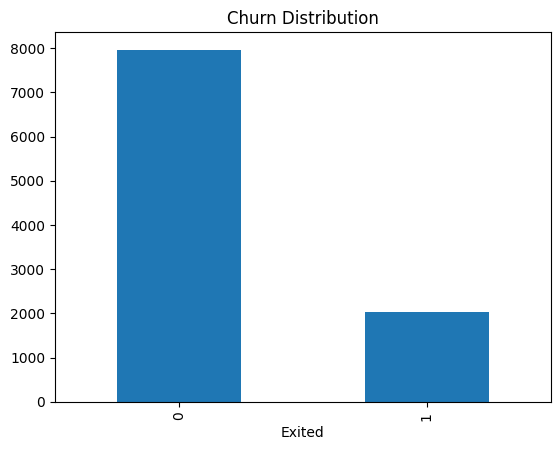

In [8]:
import matplotlib.pyplot as plt

data["Exited"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Drop ID columns
data_clean = data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

# Convert all categorical columns automatically
data_clean = pd.get_dummies(data_clean, columns=["Geography", "Gender"], drop_first=True)

X = data_clean.drop("Exited", axis=1)
y = data_clean["Exited"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

pred = model.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Model Accuracy:", accuracy)


Model Accuracy: 0.8665
